In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
import seaborn as sns

In [2]:
data = pd.read_csv('2017EE30515.csv', header = None)

In [3]:
t1 = 5
t2 = 9
num_f = 25


bin_data = data[(data[25] == t1) | (data[25] == t2)]
X_bin = np.array(bin_data.loc[:,:num_f-1])
t_bin = np.array(bin_data.loc[:,25])


In [4]:
params = [{'kernel':['poly'],'C':[1e-2,1e-1,1e0,1e1,1e2,1e3], 'gamma':[1e0], 'degree':[2,3,4,5,6], 'coef0':[10]}]
clf = GridSearchCV(SVC(), params, cv=5, n_jobs=-1, verbose=1, return_train_score=True)
clf.fit(X_bin,t_bin)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    1.8s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid=[{'kernel': ['poly'], 'C': [0.01, 0.1, 1.0, 10.0, 100.0, 1000.0], 'gamma': [1.0], 'degree': [2, 3, 4, 5, 6], 'coef0': [10]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=1)

In [5]:
scores = pd.DataFrame(clf.cv_results_)[['param_C','param_degree','mean_test_score']]
scores

,param_C,param_degree,mean_test_score
0,0.01,2,0.986667
1,0.01,3,0.990000
2,0.01,4,0.990000
3,0.01,5,0.990000
4,0.01,6,0.990000
5,0.1,2,0.986667
6,0.1,3,0.990000
7,0.1,4,0.990000
8,0.1,5,0.990000
9,0.1,6,0.990000


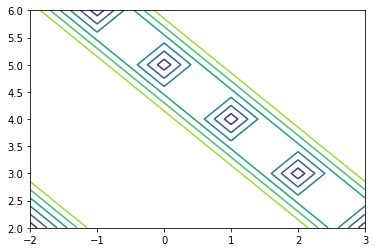

In [15]:
x,y = np.meshgrid(np.log10(np.array([1e-2,1e-1,1e0,1e1,1e2,1e3])),np.array([2,3,4,5,6]))
plt.contour(x,y,np.array(scores['mean_test_score']).reshape((5,6)))

In [14]:
x

array([[1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03],
       [1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03],
       [1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03],
       [1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03],
       [1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]])

In [11]:
params = [{'kernel': ['rbf'], 'gamma': [1e-6,1e-5,1e-4,1e-3,1e-2,1e-1,1e0,1e1],'C': [1e-3,1e-2,1e-1,1e0,1e1,1e2,1e3,1e4]}]
clf = GridSearchCV(SVC(), params, cv=5, n_jobs=-1, verbose=1, return_train_score=True)
clf.fit(X_bin,t_bin)

Fitting 5 folds for each of 64 candidates, totalling 320 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 320 out of 320 | elapsed:    7.3s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid=[{'kernel': ['rbf'], 'gamma': [1e-06, 1e-05, 0.0001, 0.001, 0.01, 0.1, 1.0, 10.0], 'C': [0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0, 10000.0]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=1)

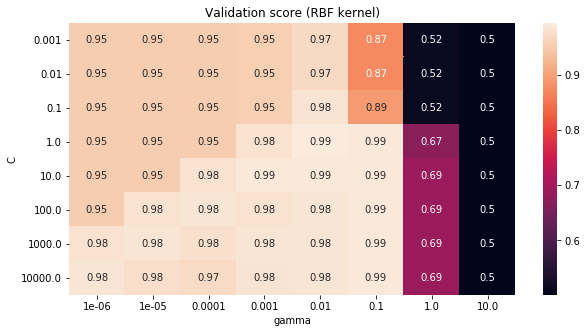

In [12]:
scores = pd.DataFrame(clf.cv_results_)[['param_C','param_gamma','mean_test_score']]
scores = scores.sort_values(by='mean_test_score',ascending=False)
scores.columns = ['C','gamma','mean_test_score']
pivot = scores.pivot(index='C',columns='gamma',values='mean_test_score')
plt.figure(figsize=(10,5))
plt.title('Validation score (RBF kernel)')
sns.heatmap(pivot,annot=True)
plt.savefig(str(t1)+str(t2)+'_'+str(num_f)+'rbf_val.png')

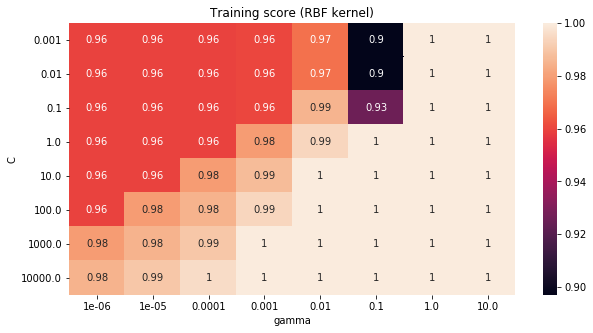

In [13]:
scores = pd.DataFrame(clf.cv_results_)[['param_C','param_gamma','mean_train_score']]
scores = scores.sort_values(by='mean_train_score',ascending=False)
scores.columns = ['C','gamma','mean_train_score']
pivot = scores.pivot(index='C',columns='gamma',values='mean_train_score')
plt.figure(figsize=(10,5))
plt.title('Training score (RBF kernel)')
sns.heatmap(pivot,annot=True)
plt.savefig(str(t1)+str(t2)+'_'+str(num_f)+'rbf_train.png')

In [14]:
params = [{'kernel':['linear'],'C':[1e-4,1e-3,1e-2,1e-1,1e0,1e1,1e2,1e3]}]
clf = GridSearchCV(SVC(), params, cv=5, n_jobs=-1, verbose=1, return_train_score=True)
clf.fit(X_bin,t_bin)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.3s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid=[{'kernel': ['linear'], 'C': [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=1)

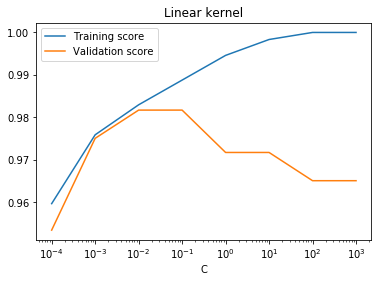

In [15]:
scores = pd.DataFrame(clf.cv_results_)[['param_C','mean_test_score','mean_train_score']]
#scores = scores.sort_values(by='mean_test_score',ascending=False)
plt.figure()
plt.title('Linear kernel')
plt.xlabel('C')
plt.plot(scores['param_C'],scores['mean_train_score'],label='Training score')
plt.plot(scores['param_C'],scores['mean_test_score'],label='Validation score')
plt.xscale('log')
plt.legend()
plt.savefig(str(t1)+str(t2)+'_'+str(num_f)+'lin.png')

In [16]:
params = [{'kernel':['poly'],'C':[1e-2,1e-1,1e0,1e1,1e2,1e3], 'gamma':[1e-2,1e-1,1e0,1e1,1e2,1e3], 'degree':[2,3,4,5], 'coef0':[0,10,50,100]}]
clf = GridSearchCV(SVC(), params, cv=5, n_jobs=-1, verbose=1, return_train_score=True)
clf.fit(X_bin,t_bin)

Fitting 5 folds for each of 576 candidates, totalling 2880 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 416 tasks      | elapsed:    4.0s
[Parallel(n_jobs=-1)]: Done 2216 tasks      | elapsed:   22.2s
[Parallel(n_jobs=-1)]: Done 2880 out of 2880 | elapsed:   28.1s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid=[{'kernel': ['poly'], 'C': [0.01, 0.1, 1.0, 10.0, 100.0, 1000.0], 'gamma': [0.01, 0.1, 1.0, 10.0, 100.0, 1000.0], 'degree': [2, 3, 4, 5], 'coef0': [0, 10, 50, 100]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=1)

In [17]:
scores = pd.DataFrame(clf.cv_results_)[['param_degree','param_coef0','mean_test_score','mean_train_score']]
scores = scores.sort_values(by='mean_test_score',ascending=False)
print(scores[scores['mean_test_score']==max(scores['mean_test_score'])].mode()['param_degree'])
print(scores[scores['mean_test_score']==max(scores['mean_test_score'])].mode()['param_coef0'])

0    2
Name: param_degree, dtype: object
0    10
Name: param_coef0, dtype: object


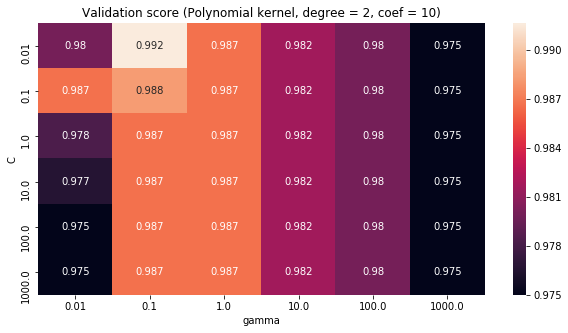

In [18]:
deg = 2
coef = 10
scores = pd.DataFrame(clf.cv_results_)[['param_C','param_gamma','param_degree','param_coef0','mean_test_score']]
scores = scores.sort_values(by='mean_test_score',ascending=False)
scores = scores[scores['param_degree'] == deg]
scores = scores[scores['param_coef0'] == coef]
del scores['param_degree']
del scores['param_coef0']
scores.columns = ['C','gamma','mean_test_score']
pivot = scores.pivot(index='C',columns='gamma',values='mean_test_score')
plt.figure(figsize=(10,5))
plt.title('Validation score (Polynomial kernel, degree = '+str(deg)+', coef = '+str(coef)+')')
sns.heatmap(pivot,annot=True,fmt='.3g')
plt.savefig(str(t1)+str(t2)+'_'+str(num_f)+'poly_val'+'_'+str(coef)+'.png')

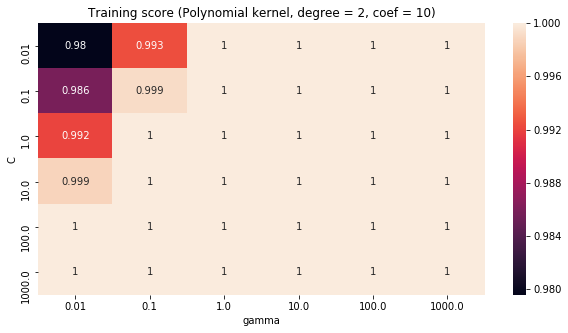

In [19]:
deg = 2
coef = 10
scores = pd.DataFrame(clf.cv_results_)[['param_C','param_gamma','param_degree','param_coef0','mean_train_score']]
scores = scores.sort_values(by='mean_train_score',ascending=False)
scores = scores[scores['param_degree'] == deg]
scores = scores[scores['param_coef0'] == coef]
del scores['param_degree']
del scores['param_coef0']
scores.columns = ['C','gamma','mean_train_score']
pivot = scores.pivot(index='C',columns='gamma',values='mean_train_score')
plt.figure(figsize=(10,5))
plt.title('Training score (Polynomial kernel, degree = '+str(deg)+', coef = '+str(coef)+')')
sns.heatmap(pivot,annot=True,fmt='.3g')
plt.savefig(str(t1)+str(t2)+'_'+str(num_f)+'poly_train'+'_'+str(coef)+'.png')

In [53]:
num_f = 10

X = np.array(data.loc[:,:num_f-1])
t = np.array(data.loc[:,25])


In [61]:
params = [{'kernel': ['rbf'], 'gamma': [1e-5,1e-4,1e-3,1e-2,1e-1,1e0,1e1,5e1],'C': [1e-3,1e-2,1e-1,1e0,1e1,1e2,1e3,1e4]}]
clf = GridSearchCV(SVC(), params, cv=5, n_jobs=-1, verbose=1, return_train_score=True)
clf.fit(X,t)

Fitting 5 folds for each of 64 candidates, totalling 320 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    9.9s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   41.1s
[Parallel(n_jobs=-1)]: Done 320 out of 320 | elapsed:  1.1min finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid=[{'kernel': ['rbf'], 'gamma': [1e-05, 0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 50.0], 'C': [0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0, 10000.0]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=1)

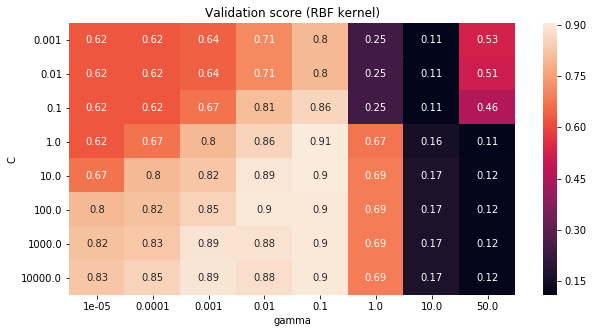

In [62]:
scores = pd.DataFrame(clf.cv_results_)[['param_C','param_gamma','mean_test_score']]
scores = scores.sort_values(by='mean_test_score',ascending=False)
scores.columns = ['C','gamma','mean_test_score']
pivot = scores.pivot(index='C',columns='gamma',values='mean_test_score')
plt.figure(figsize=(10,5))
plt.title('Validation score (RBF kernel)')
sns.heatmap(pivot,annot=True)
plt.savefig('multi'+'_'+str(num_f)+'rbf_val.png')

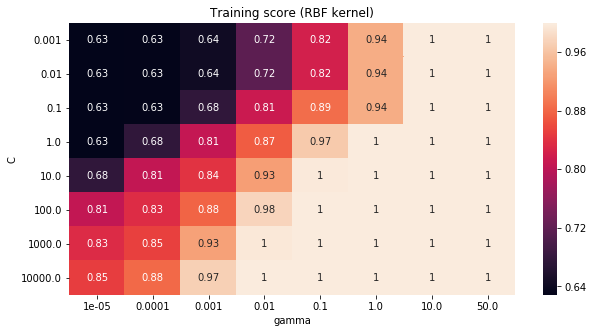

In [63]:
scores = pd.DataFrame(clf.cv_results_)[['param_C','param_gamma','mean_train_score']]
scores = scores.sort_values(by='mean_train_score',ascending=False)
scores.columns = ['C','gamma','mean_train_score']
pivot = scores.pivot(index='C',columns='gamma',values='mean_train_score')
plt.figure(figsize=(10,5))
plt.title('Training score (RBF kernel)')
sns.heatmap(pivot,annot=True)
plt.savefig('multi'+'_'+str(num_f)+'rbf_train.png')

In [78]:
params = [{'kernel':['linear'],'C':[1e-3,1e-2,1e-1,1e0,1e1,1e2,5e2]}]
clf = GridSearchCV(SVC(), params, cv=5, n_jobs=-1, verbose=1, return_train_score=True)
clf.fit(X,t)

Fitting 5 folds for each of 7 candidates, totalling 35 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  35 out of  35 | elapsed:   49.9s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid=[{'kernel': ['linear'], 'C': [0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 500.0]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=1)

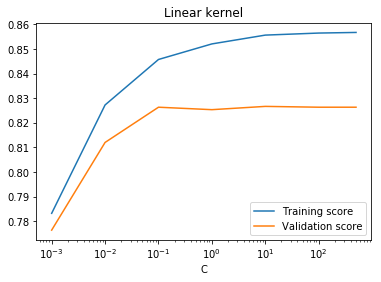

In [79]:
scores = pd.DataFrame(clf.cv_results_)[['param_C','mean_test_score','mean_train_score']]
#scores = scores.sort_values(by='mean_test_score',ascending=False)
plt.figure()
plt.title('Linear kernel')
plt.xlabel('C')
plt.plot(scores['param_C'],scores['mean_train_score'],label='Training score')
plt.plot(scores['param_C'],scores['mean_test_score'],label='Validation score')
plt.xscale('log')
plt.legend()
plt.savefig('multi'+'_'+str(num_f)+'lin.png')

In [80]:
params = [{'kernel':['poly'],'C':[1e-3,1e-2,1e-1,1e0,1e1,1e2,1e3], 'gamma':[1e-3,1e-2,1e-1,1e0,1e1,1e2,1e3], 'degree':[2,3,4,5], 'coef0':[0,10,50,100,500,1000]}]
clf = GridSearchCV(SVC(), params, cv=5, n_jobs=-1, verbose=1, return_train_score=True)
clf.fit(X_bin,t_bin)

Fitting 5 folds for each of 1176 candidates, totalling 5880 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 1556 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done 5880 out of 5880 | elapsed:    6.1s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid=[{'kernel': ['poly'], 'C': [0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0], 'gamma': [0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0], 'degree': [2, 3, 4, 5], 'coef0': [0, 10, 50, 100, 500, 1000]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=1)

In [81]:
scores = pd.DataFrame(clf.cv_results_)[['param_degree','param_coef0','mean_test_score','mean_train_score']]
scores = scores.sort_values(by='mean_test_score',ascending=False)
print(scores[scores['mean_test_score']==1].mode()['param_degree'])
print(scores[scores['mean_test_score']==1].mode()['param_coef0'])

0    3
Name: param_degree, dtype: object
0    100
Name: param_coef0, dtype: object


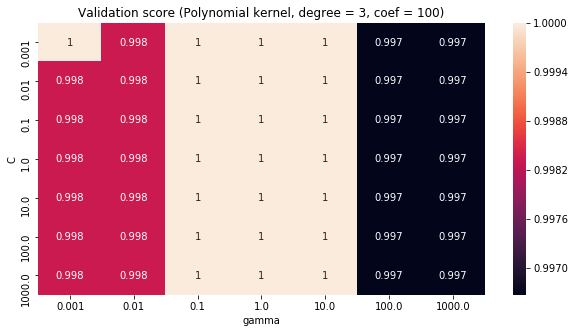

In [85]:
scores = pd.DataFrame(clf.cv_results_)[['param_C','param_gamma','param_degree','param_coef0','mean_test_score']]
scores = scores.sort_values(by='mean_test_score',ascending=False)
scores = scores[scores['param_degree'] == 3]
scores = scores[scores['param_coef0'] == 100]
del scores['param_degree']
del scores['param_coef0']
scores.columns = ['C','gamma','mean_test_score']
pivot = scores.pivot(index='C',columns='gamma',values='mean_test_score')
plt.figure(figsize=(10,5))
plt.title('Validation score (Polynomial kernel, degree = 3, coef = 100)')
sns.heatmap(pivot,annot=True, fmt='.3g')
plt.savefig('multi'+'_'+str(num_f)+'poly_val_100.png')

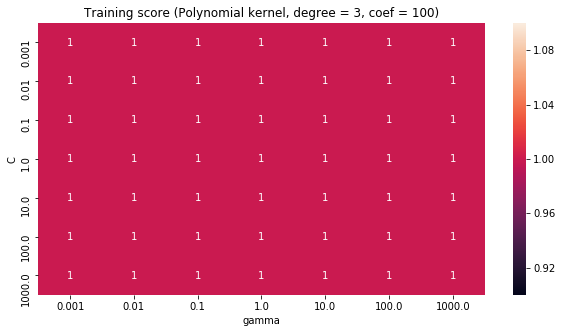

In [88]:
scores = pd.DataFrame(clf.cv_results_)[['param_C','param_gamma','param_degree','param_coef0','mean_train_score']]
scores = scores.sort_values(by='mean_train_score',ascending=False)
scores = scores[scores['param_degree'] == 3]
scores = scores[scores['param_coef0'] == 100]
del scores['param_degree']
del scores['param_coef0']
scores.columns = ['C','gamma','mean_train_score']
pivot = scores.pivot(index='C',columns='gamma',values='mean_train_score')
plt.figure(figsize=(10,5))
plt.title('Training score (Polynomial kernel, degree = 3, coef = 100)')
sns.heatmap(pivot,annot=True, fmt='.3g')
plt.savefig('multi'+'_'+str(num_f)+'poly_train_100.png')